In [51]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import librosa
import librosa.display
import pysptk
from scipy.io import wavfile
import parselmouth
import wave

from IPython.display import Audio
seaborn.set(style="whitegrid")
#rcParams['figure.figsize'] = (16, 5)

np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [12]:
data_ex, rate_ex = librosa.load("audio_01.wav")

#play audio sample - note - librosa will not process audio that has been compressed!
Audio("audio_01.wav")


Audio sampled at rate(hrz): 22050


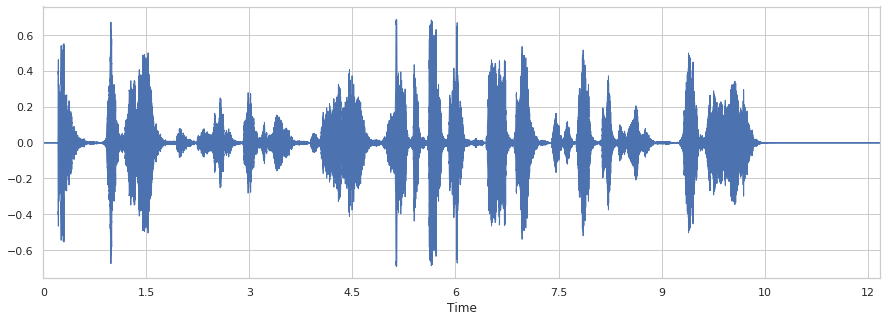

In [100]:
plt.figure(figsize = (15, 5))
librosa.display.waveplot(data_ex, sr = rate_ex)
print("Audio sampled at rate(hrz):", rate_ex)

(40, 525)


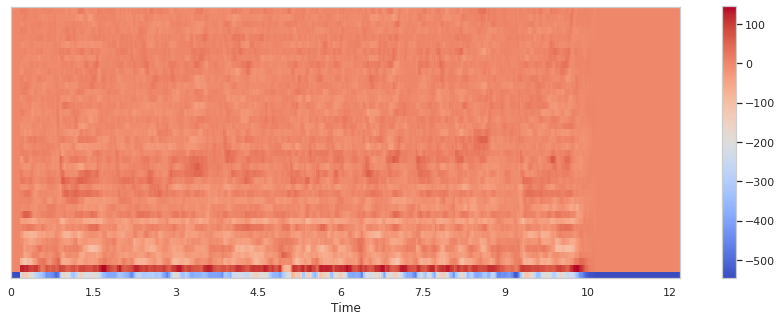

In [158]:
#mel frequency cepstal coefficients
plt.figure(figsize = (15, 5))
mfcc_ex = librosa.feature.mfcc(data_ex, sr = rate_ex, n_mfcc = 40) 
librosa.display.specshow(mfcc_ex, x_axis = "time")
plt.colorbar()

print(mfcc_ex.shape)

In [150]:

n_fft = 2048
n_mels = 128
#mel = librosa.filters.mel(data_ex, n_fft=n_fft, n_mels=n_mels) 
 
#spec = np.abs(librosa.stft(data_ex, hop_length=512))
#spec = librosa.amplitude_to_db(spec, ref=np.max)
#librosa.display.specshow(spec, sr=rate_ex, x_axis='time', y_axis='log');
#plt.colorbar(format='%+2.0f dB');
#plt.title('Spectrogram');



525


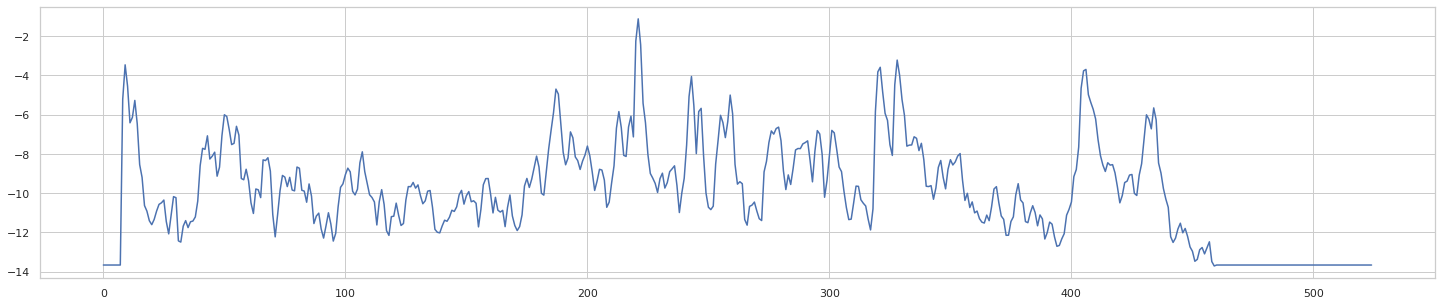

In [9]:
avg_mfcc_ex = np.mean(mfcc_ex, axis=0)
print(len(avg_mfcc_ex))
plt.figure(figsize = (25, 5))
plt.plot(avg_mfcc_ex)

(1025, 525)


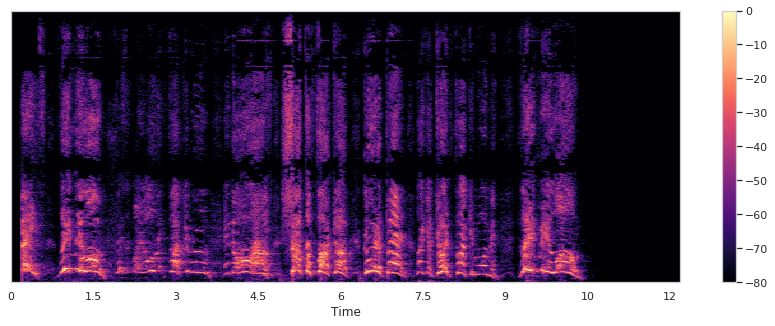

In [166]:
#mel spectrogram frequency
plt.figure(figsize = (15, 5))
mel_ex = librosa.feature.melspectrogram(data_ex, sr = rate_ex)#, fmax = 800) 
mel_ex = np.abs(librosa.stft(data_ex, n_fft = 2048, hop_length = 512))
mel_ex = librosa.amplitude_to_db(mel_ex, ref = np.max)
librosa.display.specshow(mel_ex, x_axis = "time")
plt.colorbar()
 
#add log adjustments later

print(mel_ex.shape)

(65, 132)


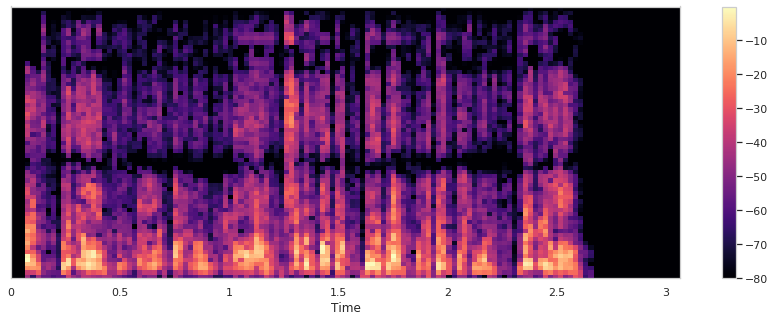

In [165]:
#mel spectrogram frequency
plt.figure(figsize = (15, 5))
mel_ex = librosa.feature.melspectrogram(data_ex, sr = rate_ex)#, fmax = 800) 
mel_ex = np.abs(librosa.stft(data_ex, n_fft = 128, hop_length = 2048))
mel_ex = librosa.amplitude_to_db(mel_ex, ref = np.max)
librosa.display.specshow(mel_ex, x_axis = "time")
plt.colorbar()
 
#add log adjustments later

print(mel_ex.shape)

(12, 525)


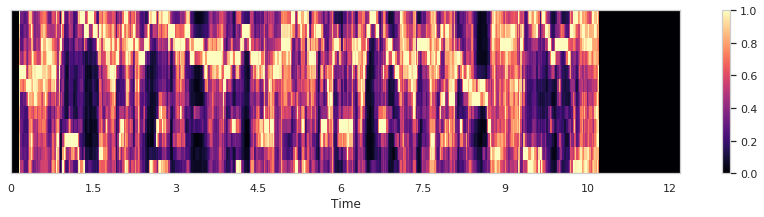

In [112]:
#chroma - pitch classes

plt.figure(figsize = (15, 3))
stft_ex = np.abs(librosa.stft(data_ex)) #resolve complex values
chroma_full= librosa.feature.chroma_stft(S=stft_ex, sr = rate_ex)

librosa.display.specshow(chroma_full, x_axis = "time")
plt.colorbar()

print(chroma_full.shape)
#print(chroma_full[5])

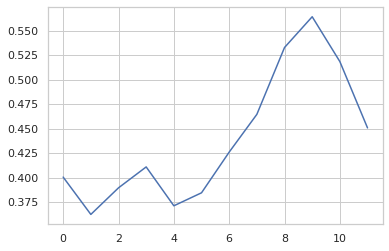

In [32]:
chroma_avg = np.mean(chroma_full.T, axis = 0)
plt.plot(chroma_avg)

In [47]:
pars_aud = parselmouth.Sound("audio_01.wav")

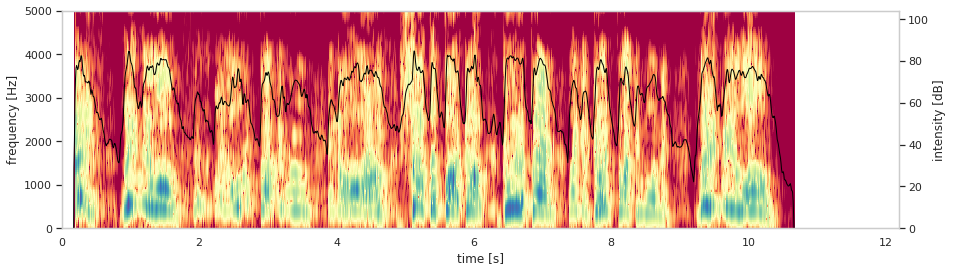

In [119]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='Spectral')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1, color='black')
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = pars_aud.to_intensity()
spectrogram = pars_aud.to_spectrogram()
plt.figure(figsize = (15, 4))
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([pars_aud.xmin, pars_aud.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

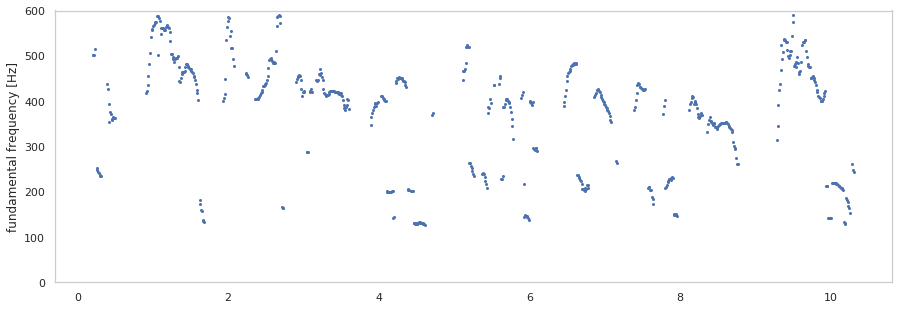

In [78]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = pars_aud.to_pitch()
plt.figure(figsize = (15, 5))
draw_pitch(pitch)


In [82]:

print(pitch.selected_array['frequency'][200:400])

[543.39975324 554.85381652 516.94379101 516.93268427 492.77536997
 477.99133147   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         461.30063673 458.93008243 456.8005092  452.13353885
   0.           0.           0.           0.           0.
   0.           0.           0.           0.         403.92256848
 404.3535143  403.76582429 405.01357977 407.49466247 409.30889703
 413.37892154 417.12992582 421.0830905  424.59968073 432.36731572
 432.70599149 435.07139786 438.5572155  440.77385314 446.21458796
 454.75600692 472.4693222  491.19755163 493.82849064 494.66289849
 492.13982399 487.5961763  483.0682742  485.62396129 483.32821506
 484.28130044 510.26525335 565.11018367 584.59633019 588.91179137
 589.41314949 587.57900187 572.12368571   0.         165.13281927
 164.73064823 165.09289316   0.           0.           0.
   0.           0.           0.           0.      

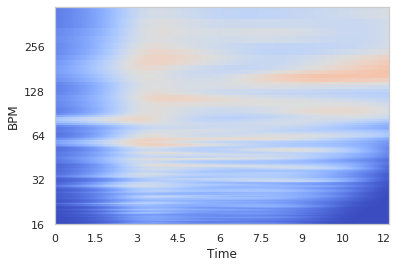

In [170]:
#the rhythm of sounds

hop_length = 512
oenv = librosa.onset.onset_strength(y = data_ex, sr=rate_ex, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=rate_ex,hop_length=hop_length)

librosa.display.specshow(tempogram, sr=rate_ex, x_axis='time', y_axis='tempo')

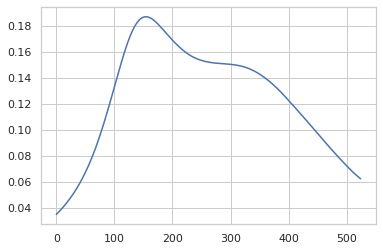

In [174]:
plt.plot(np.mean(tempogram, axis=0))

In [88]:
from parselmouth.praat import call

pointProcess = call(pars_aud, "To PointProcess (periodic, cc)", 75, 500)
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
localShimmer =  call([pars_aud, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
localdbShimmer = call([pars_aud, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq3Shimmer = call([pars_aud, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
aqpq5Shimmer = call([pars_aud, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq11Shimmer =  call([pars_aud, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
ddaShimmer = call([pars_aud, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

print(localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer)

0.025863072766684127 7.681349666366825e-05 0.013365565666806108 0.014475739644208544 0.040096697000418326 0.14260718658558685 1.2925551273032683 0.06480887496868418 0.08517195358407594 0.11922471753835945 0.19442662490605253
